In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tanzania_data = pd.read_csv('datasets/training.csv')

In [3]:
tanzania_data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
# Checking if there is any missing values in the dataset
print(tanzania_data.isnull().any())

ID                             False
Q1                             False
Q2                             False
Q3                             False
Q4                             False
Q5                             False
Q6                             False
Q7                             False
Q8_1                           False
Q8_2                           False
Q8_3                           False
Q8_4                           False
Q8_5                           False
Q8_6                           False
Q8_7                           False
Q8_8                           False
Q8_9                           False
Q8_10                          False
Q8_11                          False
Q9                             False
Q10                            False
Q11                            False
Q12                            False
Q13                            False
Q14                            False
Q15                            False
Q16                            False
Q

In [5]:
# Making sure there are no duplicates in the ID field
print(tanzania_data[tanzania_data.duplicated(subset='ID', keep='first')])

Empty DataFrame
Columns: [ID, Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8_1, Q8_2, Q8_3, Q8_4, Q8_5, Q8_6, Q8_7, Q8_8, Q8_9, Q8_10, Q8_11, Q9, Q10, Q11, Q12, Q13, Q14, Q15, Q16, Q17, Q18, Q19, Latitude, Longitude, mobile_money, savings, borrowing, insurance, mobile_money_classification]
Index: []

[0 rows x 37 columns]


In [6]:
males = tanzania_data[tanzania_data.Q2 == 1]
females = tanzania_data[tanzania_data.Q2 == 2]
males.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3
5,5462,35,1,1,3,3,2,1,0,1,...,-1,1,1,-6.362331,37.137741,0,0,1,0,1
12,8863,28,1,1,3,3,2,2,0,1,...,-1,1,4,-10.743503,34.733084,0,1,1,0,1


In [7]:
females.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
6,4886,31,2,1,3,1,2,1,0,1,...,-1,1,2,-8.089257,35.836415,1,1,1,1,3
7,621,23,2,4,5,5,2,1,0,0,...,1,2,2,-8.916028,33.433904,1,1,0,0,3
8,8302,56,2,3,3,3,2,2,0,1,...,-1,1,1,-3.972247,32.649951,0,1,1,0,1


In [8]:
x = len(females)

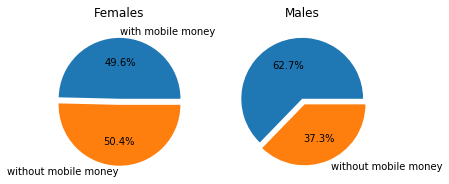

In [9]:
# Comparison of females with mobile money and females without mobile money
plt.subplot(1,2,1)
total = len(females[females.mobile_money == 1]) + len(females[females.mobile_money == 0])
y = len(females[females.mobile_money == 1]) / total * 100
z = len(females[females.mobile_money == 0]) /total * 100
plt.pie([y, z], explode=(0,0.1),labels=['with mobile money', 'without mobile money'],autopct='%1.1f%%')
plt.title('Females')

# Comparison of males with mobile money and males without mobile money
plt.subplot(1,2,2)
total = len(males[males.mobile_money == 1]) + len(males[males.mobile_money == 0])
y = len(males[males.mobile_money == 1]) / total * 100
z = len(males[males.mobile_money == 0]) /total * 100
plt.pie([y, z], explode=(0,0.1),labels=['', 'without mobile money'],autopct='%1.1f%%')
plt.title('Males')

plt.show()

In [10]:
# Average ages for people to have Mobile Money
average_male_age = males[males.mobile_money == 1].Q1.mean()
average_female_age = females[females.mobile_money == 1].Q1.mean()
average_female_age

35.531709791983765

In [11]:
# How each gender recieve money
males_wages = males[males.Q8_1 == 1]
males_trade = males[males.Q8_2 == 1]
males_service = males[males.Q8_3 == 1]
males_piece = males[males.Q8_4 == 1]
males_rent = males[males.Q8_5 == 1]
males_invest = males[males.Q8_6 == 1]
males_pension = males[males.Q8_7 == 1]
males_welfare = males[males.Q8_8 == 1]
males_3rd_party = males[males.Q8_9 == 1]
males_other = males[males.Q8_11 == 1]

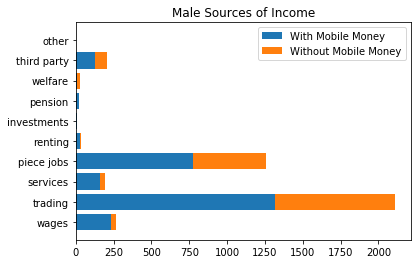

In [12]:
# Male sources of income
male_sources_of_income = [males_wages, males_trade,males_service,males_piece,
                          males_rent, males_invest, males_pension, males_welfare,
                          males_3rd_party, males_other]
sources_with_mm = []
sources_without_mm = []

for source in male_sources_of_income:
    sources_with_mm.append(len(source[source.mobile_money == 1]))
    sources_without_mm.append(len(source[source.mobile_money == 0]))

# plt.subplot(2,1,2)
plt.barh(np.arange(10), sources_with_mm, label='With Mobile Money')
plt.barh(np.arange(10), sources_without_mm, left=sources_with_mm, label='Without Mobile Money')
plt.title('Male Sources of Income')
plt.yticks(np.arange(10), 
           ['wages', 'trading', 'services', 
           'piece jobs', 'renting', 'investments', 
           'pension', 'welfare', 'third party', 'other'])
plt.legend(loc='upper right')
plt.show()

In [13]:
females_wages = females[females.Q8_1 == 1]
females_trade = females[females.Q8_2 == 1]
females_service = females[females.Q8_3 == 1]
females_piece = females[females.Q8_4 == 1]
females_rent = females[females.Q8_5 == 1]
females_invest = females[females.Q8_6 == 1]
females_pension = females[females.Q8_7 == 1]
females_welfare = females[females.Q8_8 == 1]
females_3rd_party = females[females.Q8_9 == 1]
females_other = females[females.Q8_11 == 1]

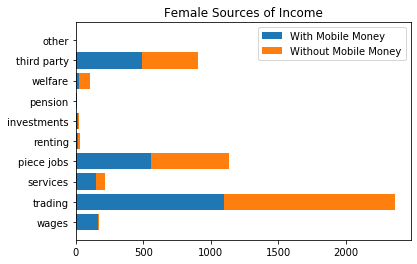

In [14]:
# Females sources of income
female_sources_of_income = [females_wages, females_trade,females_service,females_piece,
                            females_rent, females_invest, females_pension, females_welfare, 
                            females_3rd_party, females_other]
sources_with_mm = []
sources_without_mm = []

for source in female_sources_of_income:
    sources_with_mm.append(len(source[source.mobile_money == 1]))
    sources_without_mm.append(len(source[source.mobile_money == 0]))

# plt.subplot(2,1,2)
plt.barh(np.arange(10), sources_with_mm, label='With Mobile Money')
plt.barh(np.arange(10), sources_without_mm, left=sources_with_mm, label='Without Mobile Money')
plt.title('Female Sources of Income')
plt.yticks(np.arange(10), 
           ['wages', 'trading', 'services', 
           'piece jobs', 'renting', 'investments', 
           'pension', 'welfare', 'third party', 'other'])
plt.legend(loc='upper right')
plt.show()

In [15]:
# Seperating individuals with different relationship statuses
married = tanzania_data[tanzania_data.Q3 == 1]
divorced = tanzania_data[tanzania_data.Q3 == 2]
widowed = tanzania_data[tanzania_data.Q3 == 3]
single = tanzania_data[tanzania_data.Q3 == 4]

relationships = [married, divorced, widowed, single]

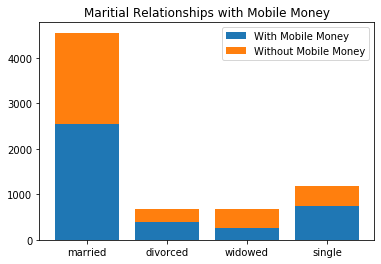

In [16]:
len_relationships_with_mm = []
len_relationships_without_mm = []

for status in relationships:
    len_relationships_with_mm.append(len(status[status.mobile_money == 1]))
    len_relationships_without_mm.append(len(status[status.mobile_money == 0]))
    
plt.bar(np.arange(4), len_relationships_with_mm, label='With Mobile Money')
plt.bar(np.arange(4), len_relationships_without_mm,  bottom=len_relationships_with_mm,label='Without Mobile Money')
plt.xticks(np.arange(4), ['married', 'divorced', 'widowed', 'single'])
plt.title('Maritial Relationships with Mobile Money')

plt.legend(loc='upper right')
plt.show()

In [17]:
# Individuals who own land 
own_land = tanzania_data[tanzania_data.Q6 == 1]
no_land = tanzania_data[tanzania_data.Q6 == 2]

In [18]:
pple_with_land = len(own_land)
pple_without_land = len(no_land)

In [19]:
land_and_mm = own_land[own_land.mobile_money == 1]
land_only = own_land[own_land.mobile_money == 0]


In [20]:
no_land_and_mm = no_land[no_land.mobile_money == 1]
no_land_only = no_land[no_land.mobile_money == 0]

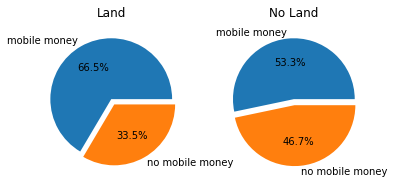

In [21]:
# People with land
plt.subplot(1,2,1)
total = len(land_and_mm) + len(land_only)
y = len(land_and_mm) / total * 100
z = len(land_only) /total * 100
plt.pie([y, z], explode=(0,0.1),labels=['mobile money', 'no mobile money'],autopct='%1.1f%%')
plt.title('Land')

# People without land
plt.subplot(1,2,2)
total = len(no_land_and_mm) + len(no_land_only)
y = len(no_land_and_mm) / total * 100
z = len(no_land_only) /total * 100
plt.pie([y, z], explode=(0,0.1),labels=['mobile money', 'no mobile money'],autopct='%1.1f%%')
plt.title('No Land')

plt.show()

In [22]:
# Access to mobile phones
has_phone = tanzania_data[tanzania_data.Q7 == 1]
no_phone = tanzania_data[tanzania_data.Q7 == 2]

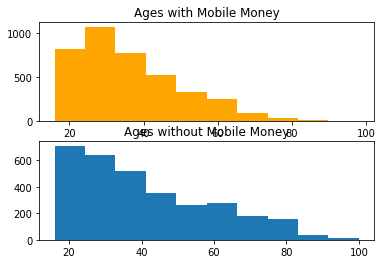

In [23]:
# Ages with mobile mone
ages_with_mm = tanzania_data[tanzania_data.mobile_money == 1]
ages_without_mm = tanzania_data[tanzania_data.mobile_money == 0]

plt.subplot(2, 1, 1)
plt.title('Ages with Mobile Money')
plt.hist(ages_with_mm.Q1, color='orange')

plt.subplot(2, 1, 2)
plt.title('Ages without Mobile Money')
plt.hist(ages_without_mm.Q1)

plt.show()

In [24]:
len(has_phone)

4271

In [25]:
len(no_phone)

2823